In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
lmt = pd.read_csv('LMT.csv')
lmt.shape

(251, 7)

In [17]:
lmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2021,354.980011,354.980011,341.070007,344.640015,337.282410,1887200
1,1/5/2021,344.640015,351.190002,343.299988,348.790009,341.343811,1479100
2,1/6/2021,343.000000,351.920013,342.779999,348.029999,340.600037,1897500
3,1/7/2021,344.359985,347.850006,341.339996,342.549988,335.237000,2048900
4,1/8/2021,341.880005,343.470001,335.010010,336.100006,328.924713,3226300


In [18]:
lmt.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
241,12/17/2020,355.929993,357.660004,351.880005,352.600006,345.072479,1658100
242,12/18/2020,352.040009,356.790009,350.010010,356.029999,348.429230,4342000
243,12/21/2020,353.160004,353.940002,346.600006,349.350006,341.891876,2128700
244,12/22/2020,349.350006,350.619995,347.390015,347.920013,340.492371,1820800
245,12/23/2020,349.950012,355.000000,349.399994,351.600006,344.093842,1307500
246,12/24/2020,352.829987,354.059998,350.399994,351.970001,344.455933,508800
247,12/28/2020,353.109985,357.820007,351.709991,354.179993,346.618744,1023400
248,12/29/2020,356.000000,357.350006,351.799988,353.899994,346.344696,1055900
249,12/30/2020,353.000000,356.609985,353.000000,354.160004,346.599152,840800
250,12/31/2020,353.820007,356.029999,352.230011,354.980011,347.401672,1318500


In [40]:
x = lmt['Open']
y = lmt['Close']

<ErrorbarContainer object of 3 artists>

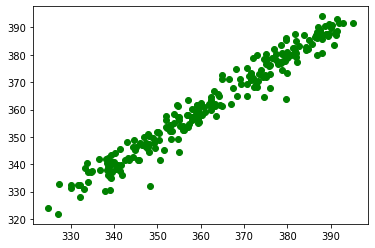

In [41]:
plt.errorbar(x,y,fmt='o',color='green')

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((225,), (26,), (225,), (26,))

In [47]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
dct.fit(X_train[:,None],y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
dct.score(X_test[:,None],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.9571881222168075

In [50]:
dct_pred = dct.predict(X_train[:,None])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [56]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [57]:
knn.fit(X_train[:,None],y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [58]:
knn.score(X_test[:,None],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.9694515135273705

In [63]:
knn_pred = knn.predict(X_test[:,None])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [71]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000)
forest.fit(X_train[:,None],y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
forest.score(X_test[:,None],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.9677826679039527

In [73]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso()
rg = Ridge()

la.fit(X_train[:,None],y_train)
rg.fit(X_train[:,None],y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
la.score(X_test[:,None],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.9766297328323671

In [75]:
rg.score(X_test[:,None],y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.9767947435708974

In [76]:
la_pred = la.predict(X_test[:,None])
rg_pred = rg.predict(X_test[:,None])
for_pred = forest.predict(X_test[:,None])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
stock = pd.DataFrame({'Open':X_test,'Close':y_test})

In [86]:
stock.head()

,Open,Close
20,327.429993,332.700012
67,387.130005,387.850006
223,375.970001,368.019989
74,387.519989,387.239990
245,349.950012,351.600006


In [88]:
la_pred.shape

(26,)

In [90]:
stock['la_pred'] = la_pred
stock['rg_pred'] = rg_pred
stock['for_pred'] = for_pred
stock['knn_pred'] = knn_pred

In [92]:
stock.head()

,Open,Close,la_pred,rg_pred,for_pred,knn_pred
20,327.429993,332.700012,327.749701,327.632680,326.821351,329.612006
67,387.130005,387.850006,386.326201,386.407417,387.986207,388.022009
223,375.970001,368.019989,375.376220,375.420379,374.179708,375.635999
74,387.519989,387.239990,386.708846,386.791357,387.760267,386.002008
245,349.950012,351.600006,349.845909,349.803667,350.941938,349.194000
